In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
import os

In [63]:
artemis_path = '../output-data/GSE-with-xpos/Artemis'
omni_path = '../output-data/GSE-with-xpos/Omni'

In [66]:
artemis_data = pd.read_csv('../output-data/GSE/Artemis/Artemis_2019-11-27_13-00.csv', delimiter=',', header=0, index_col=0)
omni_data = pd.read_csv('../output-data/GSE/Omni/Omni_2019-11-27_13-00.csv', delimiter=',', header=0, index_col=0)

In [68]:
start = 0
aStart = (artemis_data.loc[artemis_data['Time'] == omni_data['Time'][start]]).index[0]
aStop = (artemis_data.loc[artemis_data['Time'] == omni_data['Time'][start+59]]).index[0]

In [69]:
shift = 3

In [70]:
slope, intercept, rvalue, pvalue, stderr = linregress(omni_data['BZ_GSE'][start:(start+59)], artemis_data['BZ_GSE'][aStart-shift:aStop-shift])

In [71]:
x = np.arange(-50,50,1)
y = intercept + (slope*x)

In [72]:
print(omni_data['Time'][start])
print(artemis_data['Time'][aStart-shift])

2019-11-27 13:30:00
2019-11-27 13:27:00


Text(0.5, 1.0, '2019-11-27 between 13:30-14:30 UT')

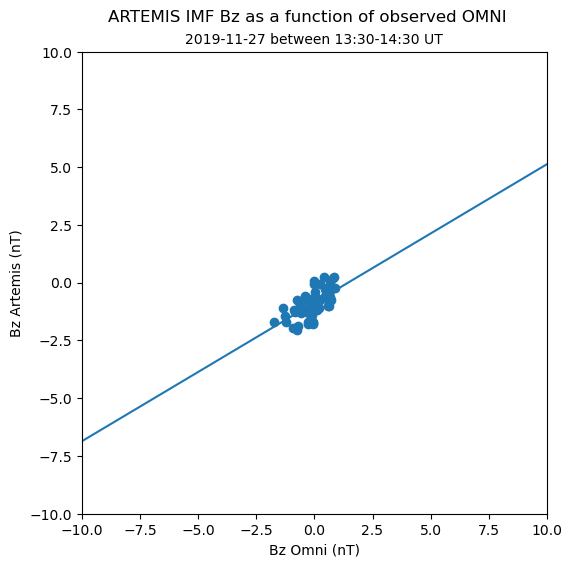

In [81]:
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(omni_data['BZ_GSE'][start:(start+59)], artemis_data['BZ_GSE'][aStart-shift:aStop-shift])
plt.plot(x,y)
plt.xlabel('Bz Omni (nT)')
plt.ylabel('Bz Artemis (nT)')

plt.xlim(-10,10)
plt.ylim(-10,10)

plt.suptitle('ARTEMIS IMF Bz as a function of observed OMNI', y=0.95)
plt.title('2019-11-27 between 13:30-14:30 UT', fontsize=10)

In [18]:
print(slope)

0.8459860782942145


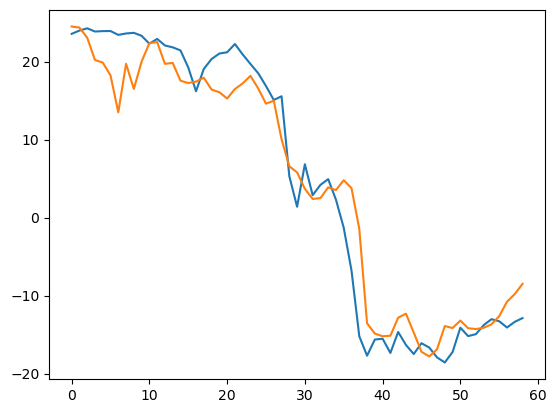

In [19]:
plt.plot([j for j in range(0,59)], omni_data['BZ_GSE'][start:(start+59)])
plt.plot([j for j in range(0,59)], artemis_data['BZ_GSE'][aStart-4:aStop-4])

plt.show()